In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from matplotlib.pyplot import figure

np.random.seed(123)
tf.random.set_seed(123)

In [2]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [3]:
df0 = pd.read_csv('Crude Oil Prices.csv', index_col='Date', parse_dates=True)

In [4]:
df = df0[['Close/Last']].copy()

In [5]:
df.reset_index(level=0, inplace=True)
df=df.sort_values(by='Date')
df=df.set_index('Date')

In [6]:
df.head()

,Close/Last
Date,
2011-08-08,81.31
2011-08-09,79.30
2011-08-10,82.89
2011-08-11,85.72
2011-08-12,85.38


In [7]:
df['LogClose/Last'] = np.log(df['Close/Last'])

c:\users\hp envy\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
df['DiffLogClose/Last'] = df['LogClose/Last'].diff()

In [9]:
Ntest = 365
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [10]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['DiffLogClose/Last']])
test_scaled = scaler.transform(test[['DiffLogClose/Last']])

In [11]:
len(train_scaled)

2194

In [12]:
type(test_scaled)

numpy.ndarray

In [13]:
df.shape

(2559, 3)

In [14]:
df.head()

,Close/Last,LogClose/Last,DiffLogClose/Last
Date,,,
2011-08-08,81.31,4.398269,NaN
2011-08-09,79.30,4.373238,-0.025031
2011-08-10,82.89,4.417514,0.044276
2011-08-11,85.72,4.451086,0.033572
2011-08-12,85.38,4.447112,-0.003974


In [15]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [16]:
train.shape

(2194, 3)

In [17]:
train.index[-1]

Timestamp('2020-02-26 00:00:00')

In [18]:
t = np.concatenate((train_scaled, test_scaled))

In [19]:
df.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
df.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()

In [20]:
df.head()

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn
Date,,,,
2011-08-08,81.31,4.398269,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010
2011-08-10,82.89,4.417514,0.044276,2.137786
2011-08-11,85.72,4.451086,0.033572,1.623651
2011-08-12,85.38,4.447112,-0.003974,-0.179671


In [21]:
df1 = df.dropna()

In [22]:
df1.shape

(2556, 4)

In [23]:
# Make supervised dataset
series = df['ScaledLogReturn'].dropna().to_numpy()

T = 30
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2526, 30) Y.shape (2526,)


In [24]:
Xtrain, Ytrain = X[Ntest:], Y[Ntest:]
Xtest, Ytest = X[:Ntest], Y[:Ntest]

In [25]:
# Basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

In [26]:
model.compile(
  loss='mse',
  optimizer='adam',
)

In [27]:
r = model.fit(
  Xtrain,
  Ytrain,
  epochs=600,
  validation_data=(Xtest, Ytest)
)

Epoch 1/600
68/68 [==============================] - 4s 18ms/step - loss: 3.5373 - val_loss: 0.9924
Epoch 2/600
68/68 [==============================] - 1s 9ms/step - loss: 2.8327 - val_loss: 0.8827
Epoch 3/600
68/68 [==============================] - 1s 9ms/step - loss: 2.3208 - val_loss: 0.8323
Epoch 4/600
68/68 [==============================] - 1s 10ms/step - loss: 1.8912 - val_loss: 0.7911
Epoch 5/600
68/68 [==============================] - 1s 10ms/step - loss: 1.6740 - val_loss: 0.7763
Epoch 6/600
68/68 [==============================] - 1s 11ms/step - loss: 1.7677 - val_loss: 0.7676
Epoch 7/600
68/68 [==============================] - 1s 10ms/step - loss: 1.8544 - val_loss: 0.7529
Epoch 8/600
68/68 [==============================] - 1s 10ms/step - loss: 1.6291 - val_loss: 0.7512
Epoch 9/600
68/68 [==============================] - 1s 10ms/step - loss: 1.7331 - val_loss: 0.7465
Epoch 10/600
68/68 [==============================] - 1s 9ms/step - loss: 1.4434 - val_loss: 0.7468
Ep

68/68 [==============================] - 1s 9ms/step - loss: 0.7629 - val_loss: 1.0356
Epoch 83/600
68/68 [==============================] - 1s 9ms/step - loss: 0.8231 - val_loss: 1.0369
Epoch 84/600
68/68 [==============================] - 1s 9ms/step - loss: 0.7262 - val_loss: 1.0311
Epoch 85/600
68/68 [==============================] - 1s 9ms/step - loss: 0.9110 - val_loss: 1.0467
Epoch 86/600
68/68 [==============================] - 1s 9ms/step - loss: 0.7490 - val_loss: 1.0457
Epoch 87/600
68/68 [==============================] - 1s 9ms/step - loss: 0.7501 - val_loss: 1.0461
Epoch 88/600
68/68 [==============================] - 1s 9ms/step - loss: 0.7434 - val_loss: 1.0465
Epoch 89/600
68/68 [==============================] - 1s 9ms/step - loss: 0.6705 - val_loss: 1.0634
Epoch 90/600
68/68 [==============================] - 1s 9ms/step - loss: 0.7081 - val_loss: 1.0533
Epoch 91/600
68/68 [==============================] - 1s 9ms/step - loss: 0.8115 - val_loss: 1.0696
Epoch 92/600


68/68 [==============================] - 1s 9ms/step - loss: 0.6067 - val_loss: 1.2291
Epoch 164/600
68/68 [==============================] - 1s 8ms/step - loss: 0.6284 - val_loss: 1.2112
Epoch 165/600
68/68 [==============================] - 1s 8ms/step - loss: 0.6920 - val_loss: 1.2189
Epoch 166/600
68/68 [==============================] - 1s 8ms/step - loss: 0.5855 - val_loss: 1.2227
Epoch 167/600
68/68 [==============================] - 1s 8ms/step - loss: 0.5907 - val_loss: 1.2161
Epoch 168/600
68/68 [==============================] - 1s 8ms/step - loss: 0.5719 - val_loss: 1.2207
Epoch 169/600
68/68 [==============================] - 1s 8ms/step - loss: 0.5805 - val_loss: 1.2275
Epoch 170/600
68/68 [==============================] - 1s 9ms/step - loss: 0.5761 - val_loss: 1.2125
Epoch 171/600
68/68 [==============================] - 1s 8ms/step - loss: 0.6130 - val_loss: 1.2359
Epoch 172/600
68/68 [==============================] - 1s 8ms/step - loss: 0.6088 - val_loss: 1.2273
Epoc

68/68 [==============================] - 1s 8ms/step - loss: 0.5569 - val_loss: 1.2975
Epoch 245/600
68/68 [==============================] - 1s 8ms/step - loss: 0.6626 - val_loss: 1.2872
Epoch 246/600
68/68 [==============================] - 1s 8ms/step - loss: 0.5766 - val_loss: 1.2983
Epoch 247/600
68/68 [==============================] - 1s 8ms/step - loss: 0.5583 - val_loss: 1.3004
Epoch 248/600
68/68 [==============================] - 1s 8ms/step - loss: 0.5307 - val_loss: 1.2780
Epoch 249/600
68/68 [==============================] - 1s 8ms/step - loss: 0.5439 - val_loss: 1.2888
Epoch 250/600
68/68 [==============================] - 1s 9ms/step - loss: 0.5406 - val_loss: 1.2840
Epoch 251/600
68/68 [==============================] - 1s 8ms/step - loss: 0.5265 - val_loss: 1.2893
Epoch 252/600
68/68 [==============================] - 1s 8ms/step - loss: 0.5544 - val_loss: 1.3023
Epoch 253/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4979 - val_loss: 1.2923
Epoc

Epoch 325/600
68/68 [==============================] - 1s 10ms/step - loss: 0.5446 - val_loss: 1.3501
Epoch 326/600
68/68 [==============================] - 1s 9ms/step - loss: 0.5392 - val_loss: 1.3569
Epoch 327/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4902 - val_loss: 1.3398
Epoch 328/600
68/68 [==============================] - 1s 9ms/step - loss: 0.5544 - val_loss: 1.3601
Epoch 329/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4949 - val_loss: 1.3549
Epoch 330/600
68/68 [==============================] - 1s 9ms/step - loss: 0.5464 - val_loss: 1.3504
Epoch 331/600
68/68 [==============================] - 1s 9ms/step - loss: 0.5342 - val_loss: 1.3630
Epoch 332/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4453 - val_loss: 1.3568
Epoch 333/600
68/68 [==============================] - 1s 9ms/step - loss: 0.5305 - val_loss: 1.3670
Epoch 334/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4915 - val_lo

68/68 [==============================] - 1s 9ms/step - loss: 0.4511 - val_loss: 1.4160
Epoch 407/600
68/68 [==============================] - 1s 8ms/step - loss: 0.4903 - val_loss: 1.4323
Epoch 408/600
68/68 [==============================] - 1s 8ms/step - loss: 0.4633 - val_loss: 1.4130
Epoch 409/600
68/68 [==============================] - 1s 8ms/step - loss: 0.5082 - val_loss: 1.4067
Epoch 410/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4720 - val_loss: 1.3840
Epoch 411/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4723 - val_loss: 1.4048
Epoch 412/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4814 - val_loss: 1.4343
Epoch 413/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4611 - val_loss: 1.4035
Epoch 414/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4732 - val_loss: 1.4148
Epoch 415/600
68/68 [==============================] - 1s 8ms/step - loss: 0.4715 - val_loss: 1.4352
Epoc

68/68 [==============================] - 1s 9ms/step - loss: 0.4647 - val_loss: 1.4670
Epoch 488/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4649 - val_loss: 1.4316
Epoch 489/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4807 - val_loss: 1.4371
Epoch 490/600
68/68 [==============================] - 1s 8ms/step - loss: 0.4691 - val_loss: 1.4530
Epoch 491/600
68/68 [==============================] - 1s 8ms/step - loss: 0.5122 - val_loss: 1.4265
Epoch 492/600
68/68 [==============================] - 1s 8ms/step - loss: 0.4498 - val_loss: 1.4414
Epoch 493/600
68/68 [==============================] - 1s 8ms/step - loss: 0.4513 - val_loss: 1.4439
Epoch 494/600
68/68 [==============================] - 1s 8ms/step - loss: 0.4567 - val_loss: 1.4325
Epoch 495/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4444 - val_loss: 1.4490
Epoch 496/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4306 - val_loss: 1.4376
Epoc

68/68 [==============================] - 1s 8ms/step - loss: 0.4227 - val_loss: 1.4716
Epoch 569/600
68/68 [==============================] - 1s 8ms/step - loss: 0.4789 - val_loss: 1.4502
Epoch 570/600
68/68 [==============================] - 1s 8ms/step - loss: 0.4920 - val_loss: 1.4989
Epoch 571/600
68/68 [==============================] - 1s 8ms/step - loss: 0.4796 - val_loss: 1.4733
Epoch 572/600
68/68 [==============================] - 1s 8ms/step - loss: 0.4646 - val_loss: 1.4536
Epoch 573/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4135 - val_loss: 1.4856
Epoch 574/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4474 - val_loss: 1.4520
Epoch 575/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4506 - val_loss: 1.4657
Epoch 576/600
68/68 [==============================] - 1s 9ms/step - loss: 0.4335 - val_loss: 1.4488
Epoch 577/600
68/68 [==============================] - 1s 8ms/step - loss: 0.4271 - val_loss: 1.4632
Epoc

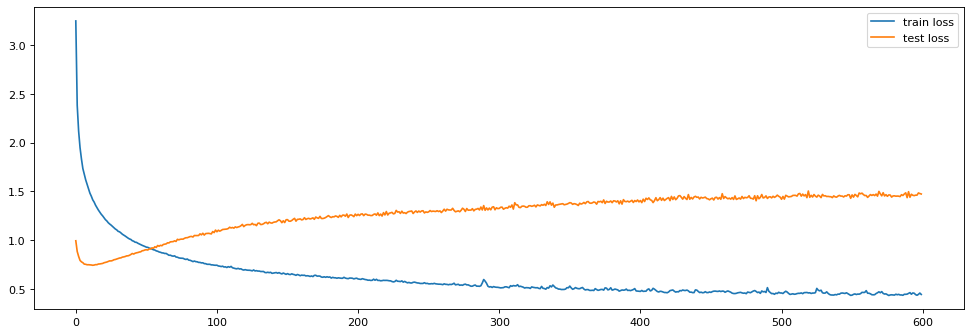

In [30]:
figure(figsize=(15,5), dpi=80)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();
plt.savefig('ann_error_plot.png')



In [31]:
train_idx[:T+1] = False # first T+1 values are not predictable

In [32]:
train_idx

array([False, False, False, ..., False, False, False])

In [33]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()

In [34]:
len(Ptrain)

2161

In [35]:
Ptrain= np.concatenate(([np.nan, np.nan], Ptrain))

In [36]:
df.shape

(2559, 4)

In [37]:
a = np.array([0,0,0,0,0,0,0,0,0,0,0,])

In [36]:
P = np.concatenate(( Ptrain,[0,0], Ptest, a))

In [38]:
# Store diff predictions
df.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

In [39]:
df.head(30)

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction
Date,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN
2011-08-15,87.88,4.475972,0.028860,1.397365,NaN,NaN
2011-08-16,86.65,4.461877,-0.014095,-0.665776,NaN,NaN
2011-08-17,87.58,4.472553,0.010676,0.523960,NaN,NaN
2011-08-18,82.38,4.411343,-0.061210,-2.928678,NaN,NaN


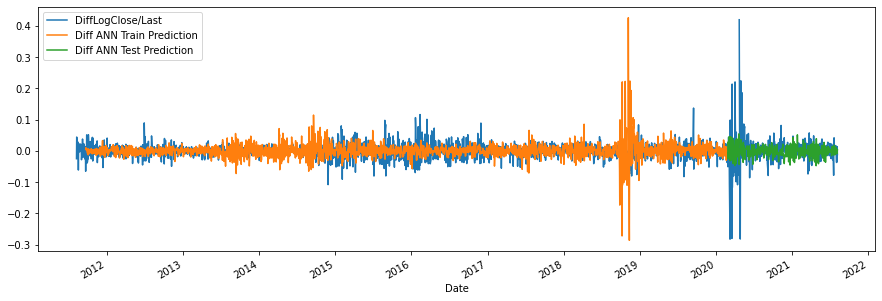

In [40]:
cols = ['DiffLogClose/Last',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
df[cols].plot(figsize=(15, 5));

In [41]:
# Needed to compute un-differenced predictions
df['ShiftLogClose/Last'] = df['LogClose/Last'].shift(1)
prev = df['ShiftLogClose/Last']
df

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction,ShiftLogClose/Last
Date,,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN,4.398269
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN,4.373238
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN,4.417514
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN,4.451086
...,...,...,...,...,...,...,...
2021-08-02,71.26,4.266335,-0.037054,-1.768478,NaN,-0.003881,4.303389
2021-08-03,70.56,4.256463,-0.009872,-0.462923,NaN,0.005391,4.266335
2021-08-04,68.15,4.221711,-0.034752,-1.657924,NaN,-0.008189,4.256463


In [42]:
# Last-known train value
last_train = train.iloc[-1]['LogClose/Last']

In [43]:
# prev[train_idx] + Ptrain

In [44]:
# 1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

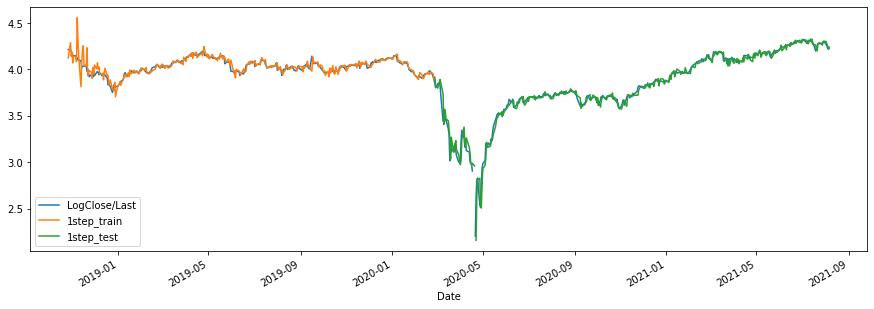

In [45]:
# plot 1-step forecast
df.iloc[-700:][['LogClose/Last', '1step_train', '1step_test']].plot(figsize=(15, 5));

In [46]:
# prev[test_idx] + np.concatenate((Ptrain, [0,0,0,0,0,0,0,0,0,0,0,0]))

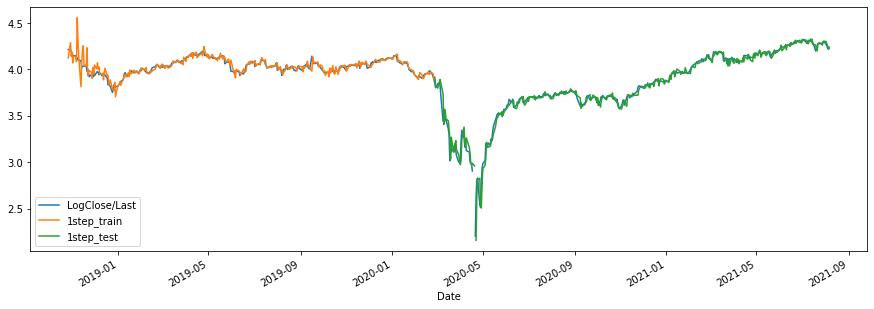

In [47]:
# plot 1-step forecast
df.iloc[-700:][['LogClose/Last', '1step_train', '1step_test']].plot(figsize=(15, 5));

In [48]:
# multi-step forecast
multistep_predictions = []

# first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
  p = model.predict(last_x.reshape(1, -1))[0]
  
  # update the predictions list
  multistep_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [49]:
multistep_predictions = np.array(multistep_predictions)
multistep_predictions = scaler.inverse_transform(
    multistep_predictions.reshape(-1, 1)).flatten()

In [50]:
# save multi-step forecast to dataframe
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

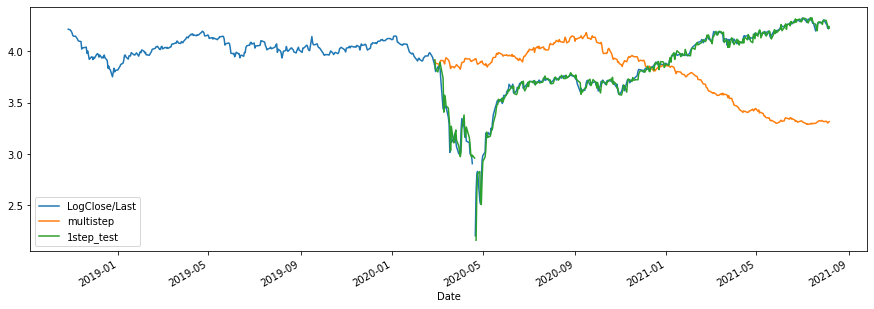

In [51]:
# plot 1-step and multi-step forecast
df.iloc[-700:][['LogClose/Last', 'multistep', '1step_test']].plot(figsize=(15, 5));

In [52]:
# test_log_pass = df.iloc[-Ntest:]['LogClose/Last']
# mape1 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, 'multistep'])
# print("multi-step MAPE:", mape1)
# mape2 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, 'multioutput'])
# print("multi-output MAPE:", mape2)

In [53]:
# make multi-output supervised dataset
Tx = T
Ty = Ntest
X = []
Y = []
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2162, 30) Y.shape (2162, 365)


In [54]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [55]:
 #Basic ANN
i = Input(shape=(Tx,))
x = Dense(32, activation='relu')(i)
x = Dense(Ty)(x)
model = Model(i, x)

In [56]:
model.compile(
  loss='mse',
  optimizer='adam',
)

In [57]:
r = model.fit(
  Xtrain_m,
  Ytrain_m,
  epochs=700,
  validation_data=(Xtest_m, Ytest_m)
)

Epoch 1/700
68/68 [==============================] - 1s 8ms/step - loss: 1.8647 - val_loss: 6.3824
Epoch 2/700
68/68 [==============================] - 0s 4ms/step - loss: 1.8494 - val_loss: 6.3593
Epoch 3/700
68/68 [==============================] - 0s 4ms/step - loss: 1.8077 - val_loss: 6.3449
Epoch 4/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7907 - val_loss: 6.3376
Epoch 5/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7789 - val_loss: 6.3342
Epoch 6/700
68/68 [==============================] - 0s 4ms/step - loss: 1.8104 - val_loss: 6.3338
Epoch 7/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7672 - val_loss: 6.3335
Epoch 8/700
68/68 [==============================] - 0s 4ms/step - loss: 1.8558 - val_loss: 6.3327
Epoch 9/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7842 - val_loss: 6.3319
Epoch 10/700
68/68 [==============================] - 0s 4ms/step - loss: 1.8715 - val_loss: 6.3325
Epoch 11/

68/68 [==============================] - 0s 4ms/step - loss: 1.8006 - val_loss: 6.3760
Epoch 84/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7993 - val_loss: 6.3779
Epoch 85/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7355 - val_loss: 6.3790
Epoch 86/700
68/68 [==============================] - 0s 4ms/step - loss: 1.8000 - val_loss: 6.3765
Epoch 87/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7291 - val_loss: 6.3738
Epoch 88/700
68/68 [==============================] - 0s 4ms/step - loss: 1.8299 - val_loss: 6.3759
Epoch 89/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7108 - val_loss: 6.3786
Epoch 90/700
68/68 [==============================] - 0s 4ms/step - loss: 1.6816 - val_loss: 6.3784
Epoch 91/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7244 - val_loss: 6.3791
Epoch 92/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7586 - val_loss: 6.3784
Epoch 93/700


68/68 [==============================] - 0s 4ms/step - loss: 1.7437 - val_loss: 6.3993
Epoch 165/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7941 - val_loss: 6.4008
Epoch 166/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7528 - val_loss: 6.3979
Epoch 167/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7808 - val_loss: 6.4026
Epoch 168/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7522 - val_loss: 6.4011
Epoch 169/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7327 - val_loss: 6.3974
Epoch 170/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7795 - val_loss: 6.4020
Epoch 171/700
68/68 [==============================] - 0s 4ms/step - loss: 1.8373 - val_loss: 6.3996
Epoch 172/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7655 - val_loss: 6.3990
Epoch 173/700
68/68 [==============================] - 0s 4ms/step - loss: 1.6911 - val_loss: 6.3977
Epoc

68/68 [==============================] - 0s 4ms/step - loss: 1.7774 - val_loss: 6.3886
Epoch 246/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7790 - val_loss: 6.3929
Epoch 247/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7925 - val_loss: 6.3930
Epoch 248/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7317 - val_loss: 6.3901
Epoch 249/700
68/68 [==============================] - 0s 4ms/step - loss: 1.8589 - val_loss: 6.3929
Epoch 250/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7609 - val_loss: 6.3933
Epoch 251/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7867 - val_loss: 6.3896
Epoch 252/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7524 - val_loss: 6.3901
Epoch 253/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7452 - val_loss: 6.3903
Epoch 254/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7818 - val_loss: 6.3901
Epoc

68/68 [==============================] - 0s 4ms/step - loss: 1.7200 - val_loss: 6.3766
Epoch 327/700
68/68 [==============================] - 0s 4ms/step - loss: 1.8158 - val_loss: 6.3769
Epoch 328/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7516 - val_loss: 6.3767
Epoch 329/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7412 - val_loss: 6.3772
Epoch 330/700
68/68 [==============================] - 0s 4ms/step - loss: 1.8122 - val_loss: 6.3787
Epoch 331/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7046 - val_loss: 6.3749
Epoch 332/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7205 - val_loss: 6.3774
Epoch 333/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7446 - val_loss: 6.3781
Epoch 334/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7485 - val_loss: 6.3766
Epoch 335/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7427 - val_loss: 6.3771
Epoc

68/68 [==============================] - 0s 5ms/step - loss: 1.8320 - val_loss: 6.3646
Epoch 408/700
68/68 [==============================] - 0s 5ms/step - loss: 1.6964 - val_loss: 6.3652
Epoch 409/700
68/68 [==============================] - 0s 5ms/step - loss: 1.7903 - val_loss: 6.3637
Epoch 410/700
68/68 [==============================] - 0s 4ms/step - loss: 1.6862 - val_loss: 6.3624
Epoch 411/700
68/68 [==============================] - 0s 4ms/step - loss: 1.6980 - val_loss: 6.3624
Epoch 412/700
68/68 [==============================] - 0s 5ms/step - loss: 1.7274 - val_loss: 6.3640
Epoch 413/700
68/68 [==============================] - 0s 6ms/step - loss: 1.7021 - val_loss: 6.3638
Epoch 414/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7860 - val_loss: 6.3638
Epoch 415/700
68/68 [==============================] - 0s 5ms/step - loss: 1.7174 - val_loss: 6.3621
Epoch 416/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7829 - val_loss: 6.3597
Epoc

68/68 [==============================] - 0s 4ms/step - loss: 1.7123 - val_loss: 6.3476
Epoch 489/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7406 - val_loss: 6.3468
Epoch 490/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7529 - val_loss: 6.3450
Epoch 491/700
68/68 [==============================] - 0s 4ms/step - loss: 1.8044 - val_loss: 6.3472
Epoch 492/700
68/68 [==============================] - 0s 4ms/step - loss: 1.8014 - val_loss: 6.3445
Epoch 493/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7456 - val_loss: 6.3430
Epoch 494/700
68/68 [==============================] - 0s 5ms/step - loss: 1.8014 - val_loss: 6.3456
Epoch 495/700
68/68 [==============================] - 1s 8ms/step - loss: 1.7074 - val_loss: 6.3420
Epoch 496/700
68/68 [==============================] - 0s 5ms/step - loss: 1.7095 - val_loss: 6.3422
Epoch 497/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7403 - val_loss: 6.3403
Epoc

68/68 [==============================] - 0s 4ms/step - loss: 1.7606 - val_loss: 6.3317
Epoch 570/700
68/68 [==============================] - 0s 4ms/step - loss: 1.8168 - val_loss: 6.3326
Epoch 571/700
68/68 [==============================] - 0s 5ms/step - loss: 1.7517 - val_loss: 6.3313
Epoch 572/700
68/68 [==============================] - 0s 7ms/step - loss: 1.7639 - val_loss: 6.3324
Epoch 573/700
68/68 [==============================] - 0s 5ms/step - loss: 1.7916 - val_loss: 6.3319
Epoch 574/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7513 - val_loss: 6.3320
Epoch 575/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7133 - val_loss: 6.3313
Epoch 576/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7047 - val_loss: 6.3323
Epoch 577/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7596 - val_loss: 6.3310
Epoch 578/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7308 - val_loss: 6.3321
Epoc

68/68 [==============================] - 0s 4ms/step - loss: 1.7537 - val_loss: 6.3322
Epoch 651/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7357 - val_loss: 6.3310
Epoch 652/700
68/68 [==============================] - ETA: 0s - loss: 1.700 - 0s 4ms/step - loss: 1.7035 - val_loss: 6.3313
Epoch 653/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7903 - val_loss: 6.3310
Epoch 654/700
68/68 [==============================] - 0s 5ms/step - loss: 1.8171 - val_loss: 6.3315
Epoch 655/700
68/68 [==============================] - 0s 6ms/step - loss: 1.7648 - val_loss: 6.3311
Epoch 656/700
68/68 [==============================] - 0s 6ms/step - loss: 1.7477 - val_loss: 6.3318
Epoch 657/700
68/68 [==============================] - ETA: 0s - loss: 1.726 - 0s 5ms/step - loss: 1.7271 - val_loss: 6.3315
Epoch 658/700
68/68 [==============================] - 0s 4ms/step - loss: 1.7956 - val_loss: 6.3321
Epoch 659/700
68/68 [==============================] - 0s

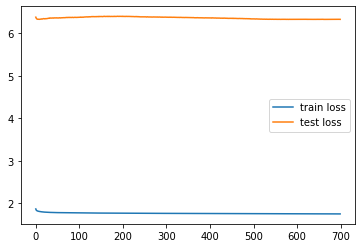

In [58]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [59]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [60]:
Ptrain.shape, Ptest.shape

((2161, 365), (365, 365))

In [61]:
Ptrain = Ptrain[:,0]
Ptest = Ptest[0]

In [62]:
# unscale
Ptest = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

In [63]:
# save multi-output forecast to dataframe
df.loc[test_idx, 'multioutput'] = last_train + \
  np.cumsum(Ptest)

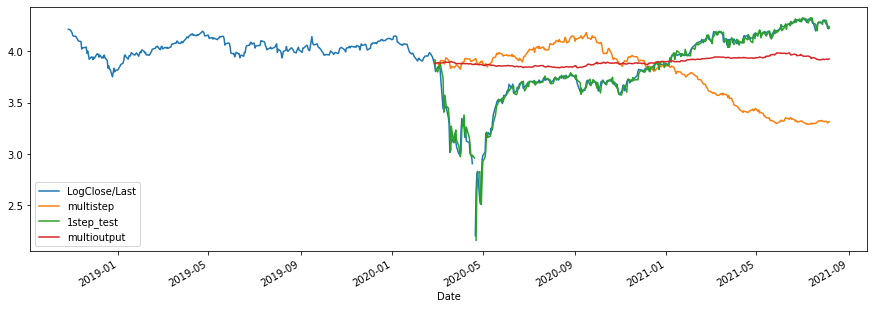

In [64]:
# plot all forecasts
cols = ['LogClose/Last', 'multistep', '1step_test', 'multioutput']
df.iloc[-700:][cols].plot(figsize=(15, 5));

In [65]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogClose/Last'].notna()

mape1 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MAPE:", mape2)
# mape0 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, '1step_test'])
# print("1step_test MAPE:", mape0)

multi-step MAPE: 48331478788497.125
multi-output MAPE: 47749907857276.21


In [66]:
df.head(10)

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction,ShiftLogClose/Last,1step_train,1step_test,multistep,multioutput
Date,,,,,,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN,4.398269,NaN,NaN,NaN,NaN
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN,4.373238,NaN,NaN,NaN,NaN
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN,4.417514,NaN,NaN,NaN,NaN
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN,4.451086,NaN,NaN,NaN,NaN
2011-08-15,87.88,4.475972,0.028860,1.397365,NaN,NaN,4.447112,NaN,NaN,NaN,NaN
2011-08-16,86.65,4.461877,-0.014095,-0.665776,NaN,NaN,4.475972,NaN,NaN,NaN,NaN
2011-08-17,87.58,4.472553,0.010676,0.523960,NaN,NaN,4.461877,NaN,NaN,NaN,NaN
2011-08-18,82.38,4.411343,-0.061210,-2.928678,NaN,NaN,4.472553,NaN,NaN,NaN,NaN


In [67]:
from sklearn.metrics import mean_squared_error

mspe1 = mean_squared_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MSPE:", mape1)
mspe2 = mean_squared_error(
    test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MSPE:", mape2)

multi-step MSPE: 48331478788497.125
multi-output MSPE: 47749907857276.21


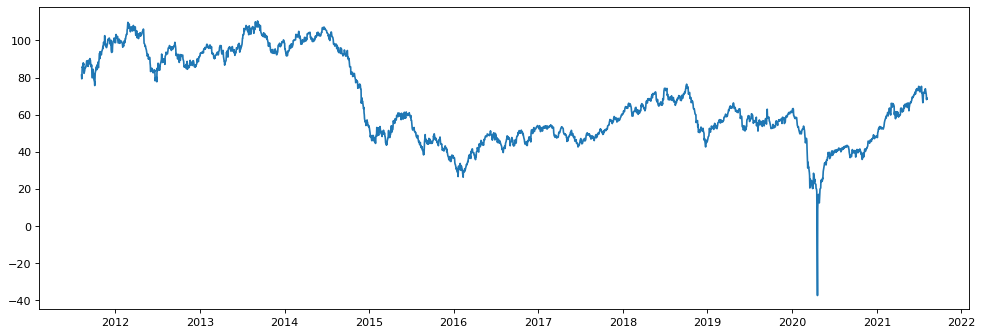

In [68]:
from matplotlib.pyplot import figure

figure(figsize=(15,5), dpi=80)
plt.plot(df.iloc[:][['Close/Last']])
plt.savefig('raw_data_plot.png')

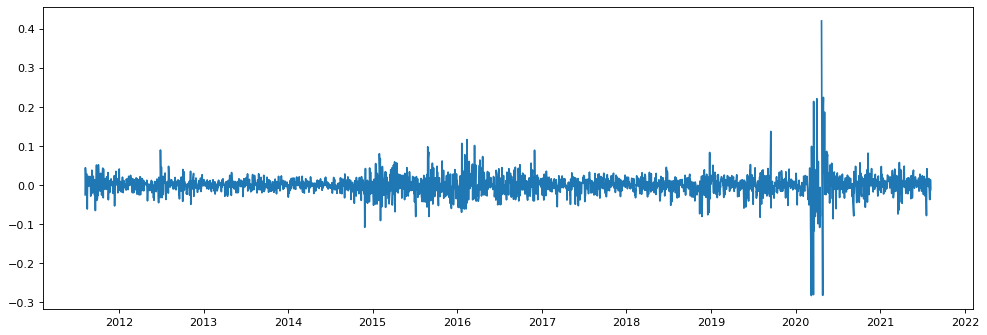

In [69]:
figure(figsize=(15,5), dpi=80)
# cols = ['DiffLogClose/Last 	']
# plt.plot(df[cols])

cols = ['DiffLogClose/Last',]
#         'Diff ANN Train Prediction',
#         'Diff ANN Test Prediction']
plt.plot(df[cols])

plt.savefig('LOGraw_data_error_plot.png')

In [71]:
from sklearn.metrics import mean_squared_error

mspe1 = mean_squared_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MSPE:", mspe1)
mspe2 = mean_squared_error(
    test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MSPE:", mspe2)

multi-step MSPE: 7.7617817
multi-output MSPE: 8.40927
